In [1]:
import numpy as np
import pandas as pd
import heapq
import spotipy
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv('bilboard_new_data.csv', sep=",")

In [3]:
data_frame.head()

,Unnamed: 0,index,i,date,title,artist,peakPos,lastPos,weeks,rank,isNew
0,0,59326,26,1958-08-11,Do You Want To Dance,Bobby Freeman,20,20,2,27,False
1,1,59327,27,1958-08-11,A Certain Smile,Johnny Mathis,22,22,2,28,False
2,2,59328,28,1958-08-11,Enchanted Island,The Four Lads,29,29,2,29,False
3,3,59329,29,1958-08-11,Moon Talk,Perry Como,30,37,2,30,False
4,4,59330,30,1958-08-11,What Am I Living For,Chuck Willis,25,25,2,31,False


In [4]:
data_frame['year'] = pd.to_datetime(data_frame['date']).dt.year

In [5]:
data_frame = data_frame.drop(['Unnamed: 0','index','i'], axis=1)

In [6]:
data_frame.head(27)

,date,title,artist,peakPos,lastPos,weeks,rank,isNew,year
0,1958-08-11,Do You Want To Dance,Bobby Freeman,20,20,2,27,False,1958
1,1958-08-11,A Certain Smile,Johnny Mathis,22,22,2,28,False,1958
2,1958-08-11,Enchanted Island,The Four Lads,29,29,2,29,False,1958
3,1958-08-11,Moon Talk,Perry Como,30,37,2,30,False,1958
4,1958-08-11,What Am I Living For,Chuck Willis,25,25,2,31,False,1958
5,1958-08-11,Think It Over,The Crickets,27,27,2,32,False,1958
6,1958-08-11,Rock-in Robin,Bobby Day,33,35,2,33,False,1958
7,1958-08-11,Bird Dog,The Everly Brothers,34,92,2,34,False,1958
8,1958-08-11,Stupid Cupid,Connie Francis,35,72,2,35,False,1958
9,1958-08-11,Blue Blue Day,Don Gibson,32,32,2,36,False,1958


In [7]:
g_dict = data_frame.groupby('year').groups

In [8]:
col_names = ['title','f_date','l_date']
values = []
for key in g_dict:
    temp = []
    ind = list(g_dict[key])
    temp.append(key)
    print(data_frame.ix[ind]['rank'].values.tolist()[0])
    if data_frame.ix[ind]['rank'].values.tolist()[0] == 1:
        print(data_frame.ix[ind]['title'].values.tolist())
#     print(data_frame.ix[ind]['rank'].values.tolist()[0])
    temp.append(data_frame.ix[ind]['rank'].values.tolist()[0])
#     break
#     temp.append(data_frame.ix[ind]['year'].tail(1).values[0])
#     values.append(temp)
# data = pd.DataFrame(data=values, columns=col_names)
# values

/home/reddyvishwatej176/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


27
34
35
34
36
34
36
36
36
27
27
35
34
36
35
36
36
34
35
35
34
34
35
36
36
36
35
36
34
35
35
34
35
35
35
35
36
36
35
34
36
35
36
35
35
36
35
34
35
36
36
36
36
35
36
36
37
36


In [9]:
data_1 = data_frame[data_frame['rank']==1]

In [10]:
data_1.head(40)

,date,title,artist,peakPos,lastPos,weeks,rank,isNew,year
26,1958-08-11,Poor Little Fool,Ricky Nelson,1,1,2,1,False,1958
126,1958-08-18,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,2,3,1,False,1958
226,1958-08-25,Little Star,The Elegants,1,2,4,1,False,1958
325,1958-09-01,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,2,5,1,False,1958
426,1958-09-08,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,6,1,False,1958
526,1958-09-15,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,7,1,False,1958
626,1958-09-22,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,8,1,False,1958
725,1958-09-29,It's All In The Game,Tommy Edwards,1,3,7,1,False,1958
826,1958-10-06,It's All In The Game,Tommy Edwards,1,1,8,1,False,1958
925,1958-10-13,It's All In The Game,Tommy Edwards,1,1,9,1,False,1958


In [11]:
g_dict = data_1.groupby('year').groups

In [12]:
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    temp = []
    ind = list(g_dict[key])
    temp.append(key)
    temp.append(data_frame.ix[ind]['title'].head(1).values[0])
    values.append(temp)
data = pd.DataFrame(data=values, columns=col_names)
data.head()

,Year,Title
0,1958,Poor Little Fool
1,1959,The Chipmunk Song
2,1960,El Paso
3,1961,Are You Lonesome To-night?
4,1962,The Lion Sleeps Tonight


In [13]:
data.to_csv('rank_1_data.csv', sep=",")

In [14]:
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')

In [15]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals.append(int(sum(temp)/len(temp)))
    else:
        vals.append(0)

In [16]:
len(vals)

58

In [17]:
len(data)

58

In [27]:
data['popularity'] = vals
data['Year_diff'] = data['Year'] - 1958
data['Log_popularity'] = np.log(data.popularity)
data['curr_popularity'] = 1
data['Log_popularity'] = data['Log_popularity'].replace([np.inf, -np.inf], -1)
data.head()

/home/reddyvishwatej176/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Title,popularity,Year_diff,Log_popularity,curr_popularity
0,1958,Splish Splash,19,0,2.944439,1
1,1959,Whole Lotta Loving,38,1,3.637586,1
2,1960,"Go, Jimmy, Go",45,2,3.806662,1
3,1961,"Corinna, Corinna",0,3,-1.000000,1
4,1962,Unchain My Heart,37,4,3.610918,1


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = data.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data['Log_popularity'])
reg.score(X, data['Log_popularity'])

0.009191908857921538

In [30]:
reg.coef_

array([0.00795243, 0.        ])

In [31]:
reg.intercept_

2.9716730292432825

In [23]:
# data_1 = data_frame[data_frame['rank']==10]
# g_dict = data_1.groupby('year').groups
# col_names = ['Year', 'Title']
# values = []
# for key in g_dict:
#     temp = []
#     ind = list(g_dict[key])
#     temp.append(key)
#     temp.append(data_frame.ix[ind]['title'].head(1).values[0])
#     values.append(temp)
# data = pd.DataFrame(data=values, columns=col_names)
# data.to_csv('rank_10_data.csv', sep=",")

In [25]:
# x = range(0,61)
# z = []
# for i in x:
#     z.append(0.00981617*i + 3.300)
    
# plt.figure(figsize=(15, 5))
# # plt.plot(data['Title'], data['popularity'], '--')
# plt.plot(data['Year_diff'], data['Log_popularity'], 'ro')
# plt.plot(x,z,'--')
# # plt.legend()
# plt.show()

[2.97167303 0.00795243]


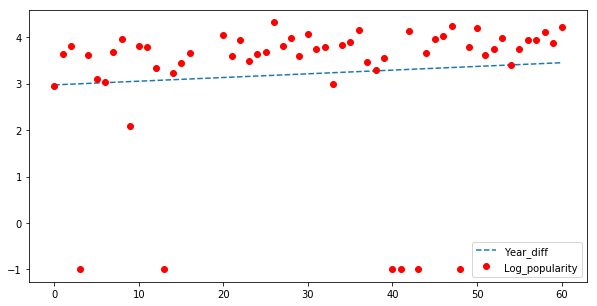

In [32]:
from scipy.optimize import curve_fit

def func_powerlaw(x, c, c0):
    return x*c0 + c

target_func = func_powerlaw

X = data['Year_diff']
y = data['Log_popularity']

popt, pcov = curve_fit(target_func, X, y, maxfev=3000)

print(popt)

plt.figure(figsize=(10, 5))
plt.plot(X, target_func(X, *popt), '--')
plt.plot(X, y, 'ro')
plt.legend()
plt.show()

In [33]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_1 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_1.append(max(temp))
    else:
        vals_1.append(0)

In [34]:
data['popularity'] = vals_1
data['Year_diff'] = data['Year'] - 1958
data['Log_popularity'] = np.log(data.popularity)
data['curr_popularity'] = 1
data['Log_popularity'] = data['Log_popularity'].replace([np.inf, -np.inf], -1)
data.head()

/home/reddyvishwatej176/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Title,popularity,Year_diff,Log_popularity,curr_popularity
0,1958,Splish Splash,53,0,3.970292,1
1,1959,Whole Lotta Loving,26,1,3.258097,1
2,1960,"Go, Jimmy, Go",32,2,3.465736,1
3,1961,"Corinna, Corinna",40,3,3.688879,1
4,1962,Unchain My Heart,64,4,4.158883,1


In [35]:
from sklearn.linear_model import LinearRegression
X = data.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data['Log_popularity'])
reg.score(X, data['Log_popularity'])

0.04169347068595153

In [36]:
reg.coef_

array([0.01377755, 0.        ])

In [37]:
reg.intercept_

3.2312679193353406

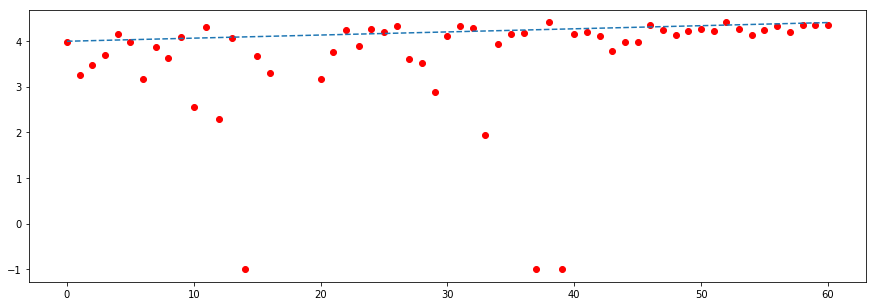

In [38]:
x = range(0,61)
z = []
for i in x:
    z.append(0.00681617*i + 3.993)
    
plt.figure(figsize=(15, 5))
# plt.plot(data['Title'], data['popularity'], '--')
plt.plot(data['Year_diff'], data['Log_popularity'], 'ro')
plt.plot(x,z,'--')
# plt.legend()
plt.show()

In [39]:
data_1 = data_frame[data_frame['rank']==2]
g_dict = data_1.groupby('year').groups
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    temp = []
    ind = list(g_dict[key])
    temp.append(key)
    temp.append(data_frame.ix[ind]['title'].head(1).values[0])
    values.append(temp)
data_2 = pd.DataFrame(data=values, columns=col_names)
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_1 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_1.append(max(temp))
    else:
        vals_1.append(0)
data_2['popularity'] = vals_1
data_2['Year_diff'] = data_2['Year'] - 1958
data_2['Log_popularity'] = np.log(data_2.popularity)
data_2['curr_popularity'] = 2
data_2['Log_popularity'] = data_2['Log_popularity'].replace([np.inf, -np.inf], -1)
X = data_2.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data_2['Log_popularity'])
reg.score(X, data_2['Log_popularity'])

/home/reddyvishwatej176/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


0.004393262578068713

In [40]:
reg.coef_

array([0.00449131, 0.        ])

In [41]:
reg.intercept_

3.5987414546616754

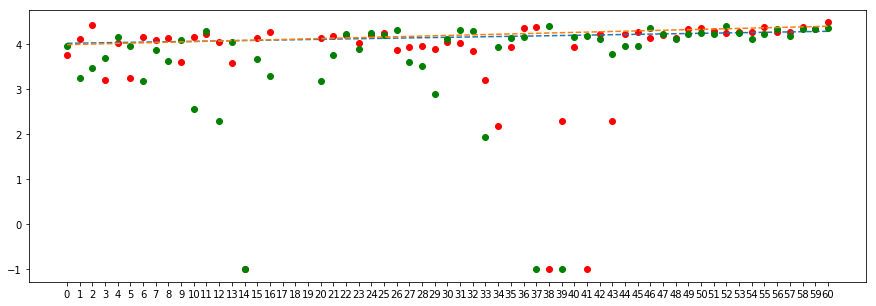

In [42]:
x_2 = range(0,61)
z_2 = []
for i in x_2:
    z_2.append(0.00444728*i + 4.023)
    
x = range(0,61)
z = []
for i in x:
    z.append(0.00681617*i + 3.993)
    
plt.figure(figsize=(15, 5))
# plt.plot(data['Title'], data['popularity'], '--')
plt.plot(data_2['Year_diff'], data_2['Log_popularity'], 'ro')
plt.plot(x_2,z_2,'--')
plt.plot(data['Year_diff'], data['Log_popularity'], 'go')
plt.plot(x,z,'--')
plt.xticks(x)
# plt.legend()
plt.show()